In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

In [2]:
image1 = Image.open("./images/img1.jpg")
img1= np.array(image1)

image2 = Image.open("./images/img2.jpg")
img2= np.array(image2)

image3 = Image.open("./images/img3.jpg")
img3= np.array(image3)

image4 = Image.open("./images/img4.jpg")
img4= np.array(image4)


In [3]:
print("image 1 : ",img1.shape)
print("image 2 : ",img2.shape)
print("image 3 : ",img3.shape)
print("image 4 : ",img4.shape)


image 1 :  (593, 460, 3)
image 2 :  (550, 550, 3)
image 3 :  (478, 850, 3)
image 4 :  (405, 720, 3)


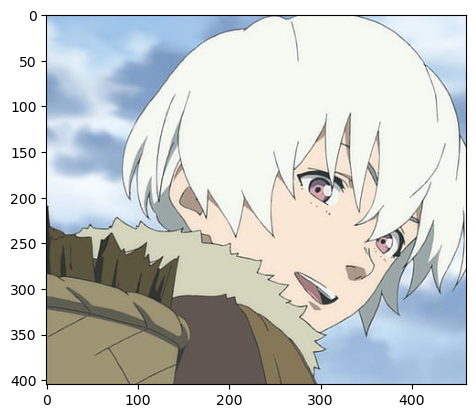

In [4]:
img1 = img1[:405,:460]
img2 = img2[:405,:460]
img3 = img3[:405,:460]
img4 = img4[:405,:460]

plt.imshow(img3)

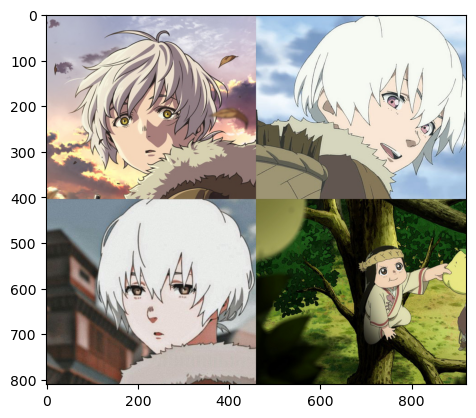

In [5]:
img12 = np.concatenate((img1,img2))
img34 = np.concatenate((img3,img4))

imgs = np.concatenate((img12,img34),axis = 1)
plt.imshow(imgs)

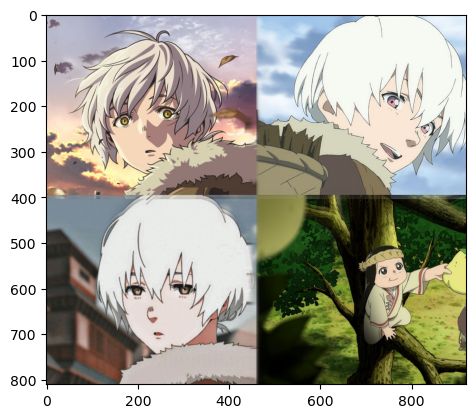

In [6]:
imgTest = imgs.copy()

for i in range(80) :
    grad = i/80
    imgTest[:,440+i] = imgTest[:,440 + i]*grad + imgTest[:,-481 + i]*(1-grad)
    imgTest[380+i,:] = imgTest[380 + i,:]*grad + imgTest[-421+ i,:]*(1-grad)

plt.imshow(imgTest)

4
(101, 115, 3)
(101, 115, 3)
(101, 115, 3)
(101, 115, 3)
4
(101, 115, 3)
(101, 115, 3)
(101, 115, 3)
(101, 115, 3)
4
(101, 115, 3)
(101, 115, 3)
(101, 115, 3)
(101, 115, 3)
4
(101, 115, 3)
(101, 115, 3)
(101, 115, 3)
(101, 115, 3)
16


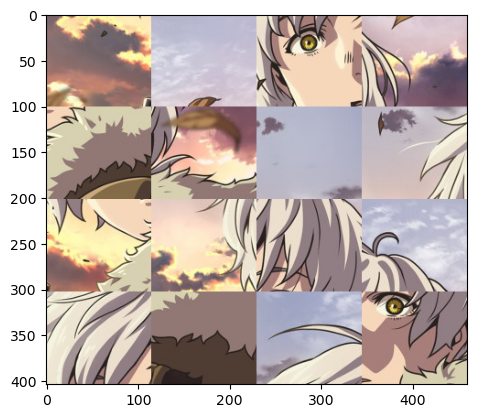

In [54]:
list_imgs = np.array_split(img1, 4)
modified_img = []

for i in range(4) :
    list_imgs[i] = list_imgs[i][:101,:,:]
    # print(list_imgs[i].shape)

for img in list_imgs :
    new_imgs = np.array_split(img,4,axis =1)
    print(len(new_imgs))
    for i in range(4) :
        # new_imgs[i] = new_imgs[i][:101,:,:]
        print(new_imgs[i].shape)
        modified_img.append(new_imgs[i])


print(len(modified_img))    

modified_img = np.array(modified_img)
image_indexs = []
parts = []

while len(image_indexs)<4:
    random_index = random.randint(0, 15)
    while random_index in image_indexs :
        random_index = random.randint(0, 15)
    parts.append(modified_img[random_index])
        
    image_indexs.append(random_index)



i=0

while len(image_indexs)<16:
    random_index = random.randint(0, 15)
    while random_index in image_indexs :
        random_index = random.randint(0, 15)

    image_indexs.append(random_index)
    if i < 3 :
        parts[0] = np.concatenate((parts[0],modified_img[random_index]),axis = 1)
        i+=1
        

    elif i < 6:
        parts[1] = np.concatenate((parts[1],modified_img[random_index]),axis = 1)
        i+=1


    elif i < 9:
        parts[2] = np.concatenate((parts[2],modified_img[random_index]),axis = 1)
        i+=1

    else :
        parts[3] = np.concatenate((parts[3],modified_img[random_index]),axis = 1)
        i+=1

    # plt.imshow(parts[0])
    # plt.imshow(parts[1])
    # plt.imshow(parts[2])
    # plt.imshow(parts[3])

        
first_part_index = random.randint(0,3)
final_img = parts[first_part_index]

for i in range (4) :
    if i != first_part_index:
        final_img = np.concatenate((final_img,parts[i]), axis = 0)

plt.imshow(final_img)
plt.show()